In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

import warnings
warnings.filterwarnings('ignore')
plt.ticklabel_format(style='plain')
%matplotlib inline


In [2]:
df_google = pd.read_csv('../data/google_cleaned.csv',parse_dates=["Released","Updated"],index_col=[0])
df_apple = pd.read_csv('../data/apple_cleaned.csv',parse_dates=["Released","Updated"],index_col=[0])

# Android Columns

In [100]:
df_google.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2312942 entries, 0 to 2312943
Data columns (total 19 columns):
 #   Column             Dtype         
---  ------             -----         
 0   App Name           object        
 1   App Id             object        
 2   Category           object        
 3   Rating             float64       
 4   Rating Count       float64       
 5   Installs           float64       
 6   Free               bool          
 7   Price              float64       
 8   Currency           object        
 9   Size               float64       
 10  Minimum OS         object        
 11  Developer          object        
 12  Developer Website  object        
 13  Released           datetime64[ns]
 14  Updated            datetime64[ns]
 15  Content Rating     object        
 16  Ad Supported       bool          
 17  In App Purchases   bool          
 18  Editors Choice     bool          
dtypes: bool(4), datetime64[ns](2), float64(5), object(8)
memory usa

# Apple Columns

In [101]:
df_apple.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1230375 entries, 0 to 1230375
Data columns (total 15 columns):
 #   Column             Non-Null Count    Dtype              
---  ------             --------------    -----              
 0   App Id             1230375 non-null  object             
 1   App Name           1230375 non-null  object             
 2   Category           1230375 non-null  object             
 3   Content Rating     1230375 non-null  object             
 4   Size               1230375 non-null  float64            
 5   Minimum OS         1230375 non-null  object             
 6   Released           1230372 non-null  datetime64[ns, UTC]
 7   Updated            1230375 non-null  datetime64[ns, UTC]
 8   Price              1230375 non-null  float64            
 9   Currency           1230375 non-null  object             
 10  Free               1230375 non-null  bool               
 11  Developer          1230375 non-null  object             
 12  Developer Webs

# General Column Info

## Android

In [25]:
with pd.option_context('float_format', '{:f}'.format):
    display(df_google.describe().T)

,count,mean,std,min,25%,50%,75%,max
Rating,2312942.000000,2.181354,2.107091,0.000000,0.000000,2.800000,4.300000,5.000000
Rating Count,2312942.000000,2836.497978,211110.733425,0.000000,0.000000,6.000000,41.000000,138557570.000000
Installs,2312835.000000,251829.358096,19130575.903197,0.000000,67.000000,598.000000,6176.000000,11028813508.000000
Price,2312942.000000,0.103499,2.633128,0.000000,0.000000,0.000000,0.000000,400.000000
Size,2312942.000000,19891429.399410,24895145.310506,3072.000000,5242880.000000,11534336.000000,25165824.000000,1073741824.000000


## Apple

In [24]:
with pd.option_context('float_format', '{:f}'.format):
    display(df_google.describe().T)

,count,mean,std,min,25%,50%,75%,max
Rating,2312942.000000,2.181354,2.107091,0.000000,0.000000,2.800000,4.300000,5.000000
Rating Count,2312942.000000,2836.497978,211110.733425,0.000000,0.000000,6.000000,41.000000,138557570.000000
Installs,2312835.000000,251829.358096,19130575.903197,0.000000,67.000000,598.000000,6176.000000,11028813508.000000
Price,2312942.000000,0.103499,2.633128,0.000000,0.000000,0.000000,0.000000,400.000000
Size,2312942.000000,19891429.399410,24895145.310506,3072.000000,5242880.000000,11534336.000000,25165824.000000,1073741824.000000


# Categories

## Apps per Category

### Android

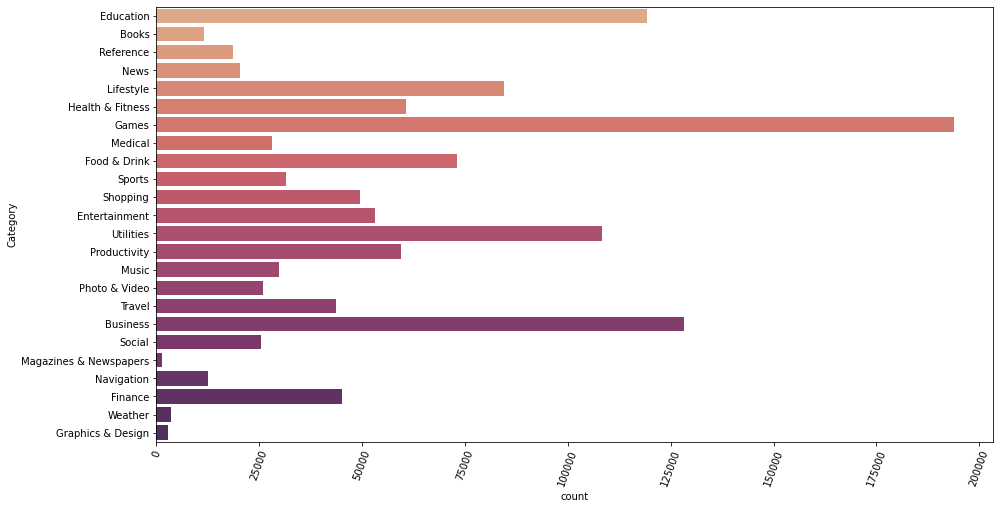

In [49]:
plt.subplots(figsize=(15,8))
data = df_google['Category'].value_counts()

plt.xticks(rotation=70)
#sns.barplot(x=data.index,y=data)
sns.countplot(y='Category',data=df_apple,palette='flare')
plt.show()

### Apple

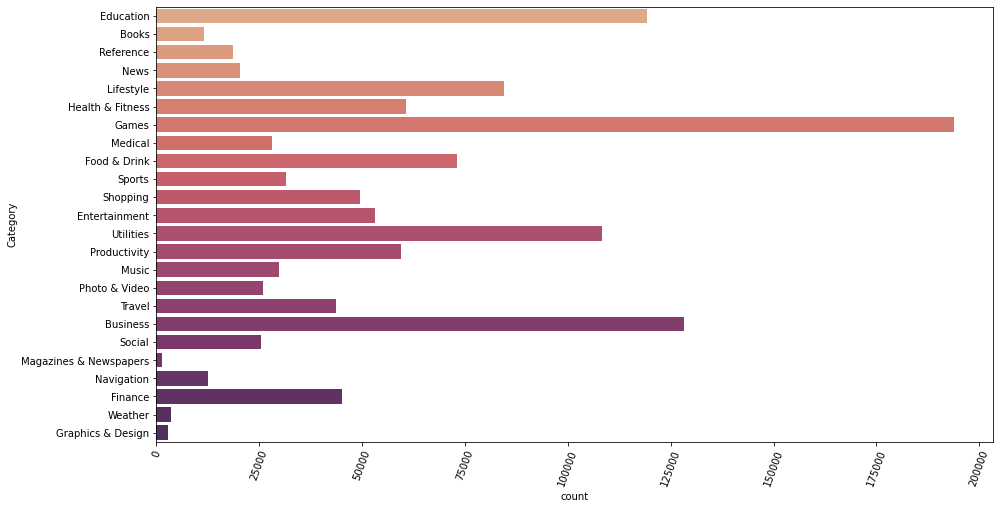

In [48]:
plt.subplots(figsize=(15,8))
data = df_apple['Category'].value_counts()

plt.xticks(rotation=70)
#sns.barplot(x=data.index,y=data)
sns.countplot(y='Category',data=df_apple,palette='flare')


plt.show()

# Rating

## Android

,count,mean,std,min,25%,50%,75%,max
Rating,2312942.0,2.181354,2.107091,0.0,0.0,2.8,4.3,5.0


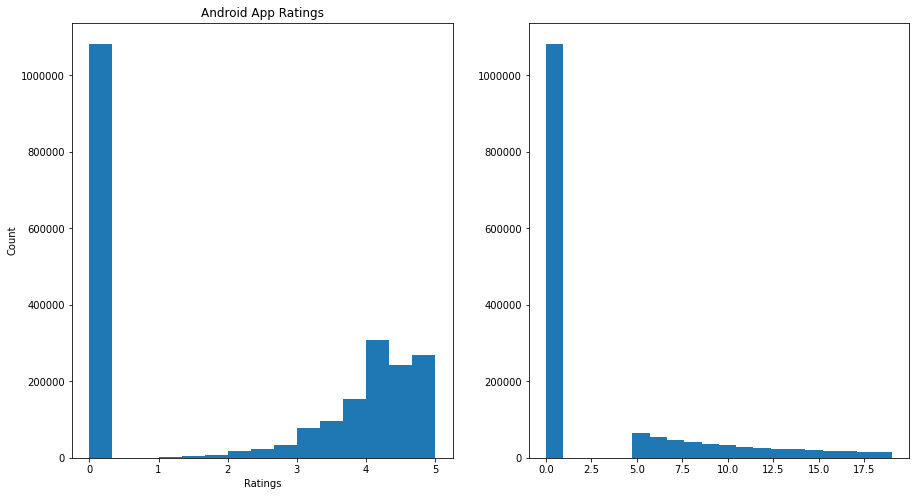

In [19]:
_,ax=plt.subplots(1,2,figsize=(15,8))

ax[0].ticklabel_format(style='plain')
ax[0].hist(df_google["Rating"],bins=15)
ax[0].set(title="Android App Ratings",xlabel="Ratings",ylabel="Count")

ax[1].ticklabel_format(style='plain')
ax[1].hist(df_google[df_google["Rating Count"] < 20]["Rating Count"],bins=20)

display(df_google.describe()[["Rating"]].T)
plt.show()

## Apple

,count,mean,std,min,25%,50%,75%,max
Rating,1230375.0,1.788384,2.154104,0.0,0.0,0.0,4.33333,5.0


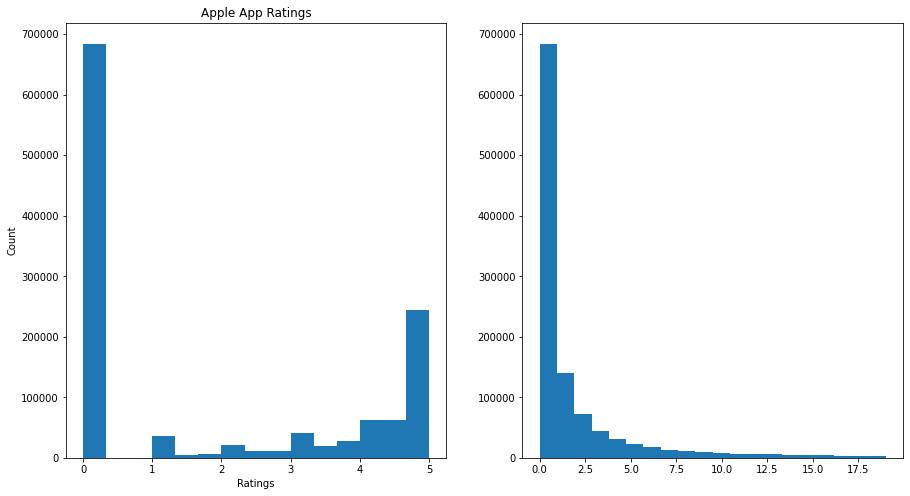

In [18]:
_,ax=plt.subplots(1,2,figsize=(15,8))

ax[0].ticklabel_format(style='plain')
ax[0].hist(df_apple["Rating"],bins=15)
ax[0].set(title="Apple App Ratings",xlabel="Ratings",ylabel="Count")

ax[1].ticklabel_format(style='plain')
ax[1].hist(df_apple[df_apple["Rating Count"] < 20]["Rating Count"],bins=20)

display(df_apple.describe()[["Rating"]].T)

plt.show()

In [30]:
df_google.loc[df_google["App Name"].str.contains("Gakondo",regex=True)]

,App Name,App Id,Category,Rating,Rating Count,Installs,Free,Price,Currency,Size,Minimum OS,Developer,Developer Website,Released,Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,Gakondo,com.ishakwe.gakondo,Games,0.0,0.0,12.0,True,0.0,USD,10485760.0,7.1,Jean Confident Irénée NIYIZIBYOSE,https://beniyizibyose.tk/#/,2020-02-26,2020-02-26,Everyone,False,False,False


# Duplicates

In [42]:
print("Number of  duplicates in Android Dataset " + str(len(df_google) - len(df_google.drop_duplicates(subset=["App Id",]))))
print("Number of  duplicates in Apple Dataset " + str(len(df_apple) - len(df_apple.drop_duplicates(subset=["App Id",]))))

Number of  duplicates in Android Dataset 0
Number of  duplicates in Apple Dataset 0


# Free Vs Non-Free

## Android

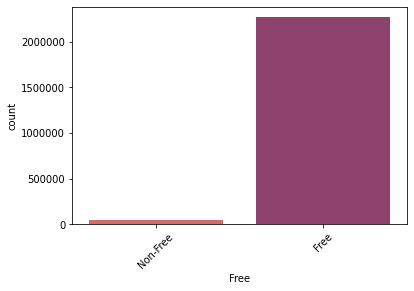

In [57]:
g=sns.countplot(x='Free',data=df_google,palette='flare')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')

g.set_xticklabels(['Non-Free','Free'])
plt.show()

## Apple

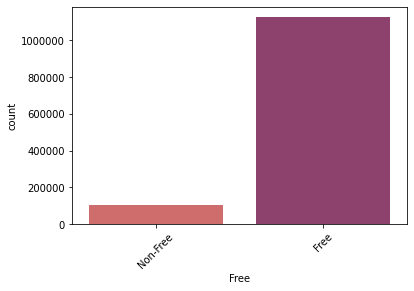

In [59]:
g=sns.countplot(x='Free',data=df_apple,palette='flare')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')

g.set_xticklabels(['Non-Free','Free'])
plt.show()

# Correlation

## Android

In [61]:
df_google.corr()

,Rating,Rating Count,Installs,Free,Price,Size,Ad Supported,In App Purchases,Editors Choice
Rating,1.000000,0.013107,0.012257,-0.011387,-0.003309,0.053367,0.162949,0.150997,0.019579
Rating Count,0.013107,1.000000,0.552743,0.001397,-0.000406,0.016733,0.005321,0.025558,0.137313
Installs,0.012257,0.552743,1.000000,0.001758,-0.000499,0.008858,0.002664,0.015520,0.063231
Free,-0.011387,0.001397,0.001758,1.000000,-0.278831,-0.006457,0.123617,0.008669,-0.003157
Price,-0.003309,-0.000406,-0.000499,-0.278831,1.000000,0.004501,-0.034276,-0.002634,0.000503
Size,0.053367,0.016733,0.008858,-0.006457,0.004501,1.000000,-0.047643,0.175709,0.042346
Ad Supported,0.162949,0.005321,0.002664,0.123617,-0.034276,-0.047643,1.000000,0.138313,0.005702
In App Purchases,0.150997,0.025558,0.015520,0.008669,-0.002634,0.175709,0.138313,1.000000,0.046078
Editors Choice,0.019579,0.137313,0.063231,-0.003157,0.000503,0.042346,0.005702,0.046078,1.000000


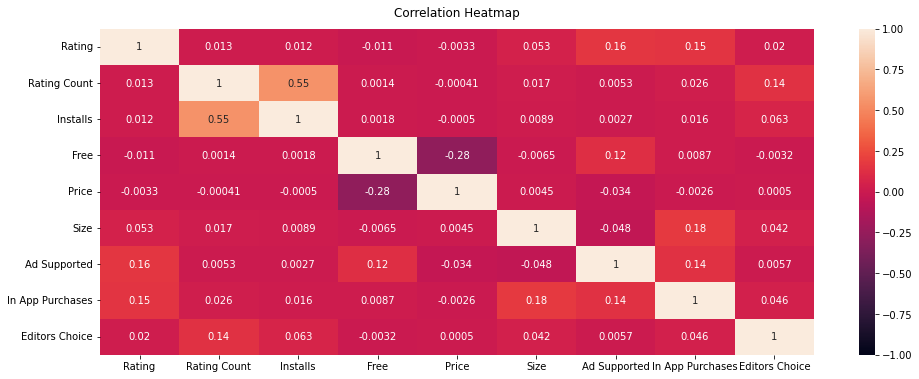

In [11]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_google.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);



In [ ]:
## Apple

In [62]:
df_apple.corr()

,Size,Price,Free,Rating,Rating Count
Size,1.000000,0.056303,-0.048080,0.048474,0.011250
Price,0.056303,1.000000,-0.242745,-0.010434,-0.001087
Free,-0.048080,-0.242745,1.000000,0.000246,0.004428
Rating,0.048474,-0.010434,0.000246,1.000000,0.022167
Rating Count,0.011250,-0.001087,0.004428,0.022167,1.000000


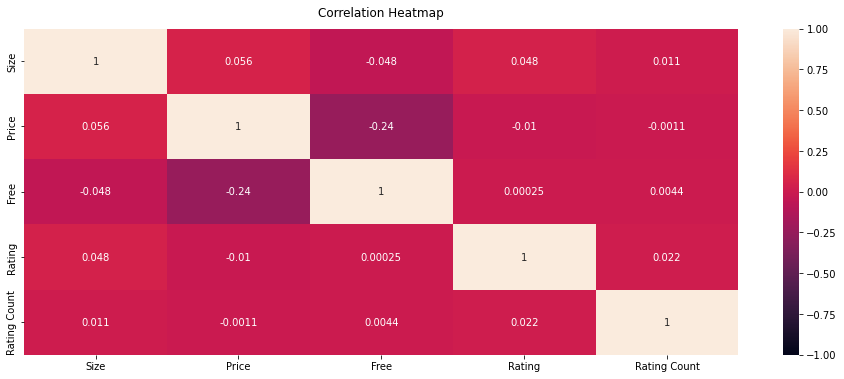

In [63]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_apple.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);